# Proyek Analisis Data: PRSA_Data_Shunyi_20130301-20170228
- **Nama:** Putri Rifdah Nabila
- **Email:** nabilanyaputri@gmail.com
- **ID Dicoding:** putri090504

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 Pada bulan apa rata-rata konsentrasi PM2.5 dalam udara mencapai nilai tertingginya di tahun 2016?
- Pertanyaan 2 Di jam berapakah rata-rata jumlah PM2.5 di udara tinggi?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [5]:
prsa_shunyi_df = pd.read_csv("./data/PRSA_Data_Shunyi_20130301-20170228.csv")
prsa_shunyi_df.head(15)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi
5,6,2013,3,1,5,11.0,11.0,3.0,7.0,200.0,45.0,-2.8,1028.2,-22.1,0.0,NNW,1.7,Shunyi
6,7,2013,3,1,6,12.0,12.0,3.0,9.0,300.0,74.0,-4.0,1029.0,-21.2,0.0,NNE,1.6,Shunyi
7,8,2013,3,1,7,13.0,13.0,3.0,23.0,300.0,59.0,-2.4,1030.5,-21.3,0.0,NE,1.7,Shunyi
8,9,2013,3,1,8,8.0,8.0,3.0,19.0,400.0,66.0,-1.0,1031.2,-21.8,0.0,NNW,2.7,Shunyi
9,10,2013,3,1,9,3.0,6.0,3.0,21.0,400.0,60.0,0.0,1031.3,-22.9,0.0,SSW,0.8,Shunyi


**Insight:**
- Data menunjukkan bahwa pada 1 Maret 2013, kualitas udara di stasiun pengukuran Shunyi bervariasi, dengan nilai PM2.5 dan PM10 yang relatif rendah, meskipun ada konsentrasi ozon yang tinggi. Suhu dan tekanan atmosfer menunjukkan kondisi yang cukup stabil, sementara kelembapan udara rendah dengan tidak ada curah hujan yang tercatat.

### Assessing Data

In [6]:
prsa_shunyi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [7]:
prsa_shunyi_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64

In [8]:
print("Jumlah duplikasi: ", prsa_shunyi_df.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
prsa_shunyi_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34151.000000,34516.000000,33768.000000,33699.000000,32886.000000,33575.000000,35013.000000,35013.000000,35010.000000,35013.000000,35020.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.491602,98.737026,13.572039,43.908865,1187.063979,55.201321,13.387969,1013.061938,2.465036,0.061094,1.807533
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.231739,89.143718,19.572068,30.996828,1156.374102,54.873726,11.483588,10.177339,13.726622,0.761668,1.287817
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,19.000000,31.000000,2.000000,19.000000,400.000000,10.000000,3.000000,1004.700000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,77.000000,5.000000,37.000000,800.000000,43.000000,14.400000,1012.700000,3.100000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,138.000000,17.000000,62.000000,1500.000000,77.000000,23.200000,1021.000000,15.100000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,941.000000,999.000000,239.000000,258.000000,10000.000000,351.716400,40.600000,1042.800000,27.500000,37.300000,12.800000


**Insight:**
- Data menunjukkan bahwa kualitas udara di daerah pengukuran bervariasi secara signifikan, dengan konsentrasi polutan yang tinggi seperti PM2.5 dan O3. Ada juga variasi yang besar dalam suhu, tekanan, dan kecepatan angin. Nilai maksimum untuk beberapa parameter menunjukkan potensi risiko kesehatan yang serius, dan nilai rata-rata yang tinggi untuk PM2.5 dan O3 menandakan perlunya tindakan mitigasi untuk memperbaiki kualitas udara.

### Cleaning Data

In [10]:
#Untuk kolom PM2.5, PM10, SO2, NO2, CO, dan O3 karena data polutan cenderung berkesinambungan, maka saya menggunakan teknik interpolasi

prsa_shunyi_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']] = prsa_shunyi_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].interpolate(method='linear')

In [11]:
#Sama seperti kolom polutan, kolom cuaca (TEMP, PRES, DEWP, RAIN) juga berkesinambungan, jadi saya menggunakan teknik interpolasi linier

prsa_shunyi_df[['TEMP', 'PRES', 'DEWP', 'RAIN']] = prsa_shunyi_df[['TEMP', 'PRES', 'DEWP', 'RAIN']].interpolate(method='linear')

In [12]:
#Untuk kolom wd menggunakan teknik imputasi dengan Mode (yang paling sering muncul)

prsa_shunyi_df['wd'] = prsa_shunyi_df['wd'].fillna(prsa_shunyi_df['wd'].mode()[0])

In [13]:
#Menggunakan interpolasi linier karena kecepatan angin biasanya berubah secara kontinu

prsa_shunyi_df['WSPM'] = prsa_shunyi_df['WSPM'].interpolate(method='linear')

In [14]:
prsa_shunyi_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [15]:
prsa_shunyi_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.437962,99.271936,13.445971,44.094695,1197.904660,54.218810,13.375531,1013.071937,2.450821,0.061010,1.807784
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.500282,90.579040,19.463506,30.907747,1162.920922,54.592684,11.484913,10.177512,13.732520,0.761118,1.287542
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,19.000000,31.000000,2.000000,20.000000,400.000000,10.000000,3.000000,1004.700000,-8.900000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,77.000000,5.000000,37.000000,900.000000,42.000000,14.400000,1012.800000,3.100000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,139.000000,16.000000,62.000000,1500.000000,76.000000,23.200000,1021.000000,15.100000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,941.000000,999.000000,239.000000,258.000000,10000.000000,351.716400,40.600000,1042.800000,27.500000,37.300000,12.800000


In [16]:
prsa_shunyi_df.to_csv("main_data.csv", index=False)

**Insight:**
- Data menunjukkan bahwa kualitas udara di daerah pengukuran berfluktuasi secara signifikan, dengan konsentrasi polutan seperti PM2.5 dan O3 yang tinggi. Ada variasi besar dalam suhu, tekanan, dan kecepatan angin. Nilai maksimum untuk beberapa parameter menunjukkan potensi risiko kesehatan yang serius, dan nilai rata-rata yang tinggi untuk PM2.5 dan O3 menandakan perlunya tindakan mitigasi untuk memperbaiki kualitas udara. Secara keseluruhan, data ini menggambarkan tantangan serius terkait kualitas udara yang perlu ditangani.

## Exploratory Data Analysis (EDA)

### Explore prsa_shunyi_df

In [17]:
prsa_shunyi_df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
8233,8234,2014,2,7,1,100.0,84.0,41.0,44.0,1200.000000,17.0,-2.100,1026.9,-6.3,0.0,SE,1.8,Shunyi
30123,30124,2016,8,7,3,41.0,41.0,2.0,8.0,666.666667,52.0,25.400,1002.3,22.5,0.0,NNE,3.2,Shunyi
25218,25219,2016,1,15,18,100.0,121.0,36.0,95.0,1700.000000,8.0,1.300,1013.7,-15.7,0.0,SSE,0.8,Shunyi
34077,34078,2017,1,18,21,80.0,103.0,23.0,89.0,1500.000000,4.0,-1.325,1028.0,-13.8,0.0,SE,1.2,Shunyi
23716,23717,2015,11,14,4,240.0,240.0,9.0,61.0,3700.000000,2.0,7.300,1013.6,5.4,0.0,NNE,1.0,Shunyi


In [18]:
# melihat rata-rata PM2.5, PM10, CO, dan TEMP perbulannya dari tahun 2013 s.d 2017

prsa_shunyi_df.groupby(by=["year", "month"]).agg({
    "PM2.5": "mean",
    "PM10": "mean",
    "CO": "mean",
    "TEMP": "mean"
})

PM2.5        PM10           CO       TEMP
year month                                                
2013 3      104.636425  127.721102  1388.592742   5.645161
     4       57.781250   83.029167  1016.790972  12.219722
     5       79.924059  125.364919  1008.179435  21.645161
     6      105.725000  112.927778  1326.121528  23.644167
     7       61.924731   68.613575  1279.198253  27.130511
     8       60.415323   70.002688  1118.704301  26.535484
     9       72.483333   92.050000  1218.325000  20.280278
     10      83.161290  108.051747  1118.548387  12.770027
     11      66.957639   88.156250  1203.472222   5.678611
     12      64.454301   75.391129  1733.266129  -0.208333
2014 1       93.642473  112.892473  1643.548387  -0.613710
     2      161.186756  155.152530  2001.264881  -0.348214
     3       97.760753  132.475806  1229.435484   9.652823
     4       87.926389  141.174306   906.597222  17.080833
     5       64.373790  109.691935   880.645161  21.746102
     6       55.820833   74.882639   704.166667  25.006806
     7       95.292473  113.213306   950.604839  28.156317
     8       62.567339   83.191263   796.639785  26.233468
     9       68.202778   83.513889   940.000000  20.295972
     10     108.215054  128.877016  1232.594086  13.518952
     11      81.267639  120.547083  1449.861111   5.730556
     12      51.856317   87.200941  1400.537634  -1.353898
2015 1       99.037366  108.825672  1715.188172  -1.241398
     2       91.833333  117.834821  1292.857143   0.957589
     3       87.923387  142.109409  1104.569892   8.353360
     4       74.112500  112.084653   735.555556  15.544444
     5       58.140457   84.109543   651.612903  21.203831
     6       64.653889   78.855278  1108.194444  24.247500
     7       62.158602   71.894489   777.217742  26.247581
     8       43.665995   61.059140   768.077957  26.007661
     9       48.625694   60.615278   724.930556  20.387500
     10      75.273522   90.004032   880.309140  13.809140
     11     116.900000  118.911111  1820.763889   3.078472
     12     155.458333  159.329973  2679.973118  -0.438710
2016 1       70.515457   77.614919  1388.911290  -4.618011
     2       49.274425   54.706178   860.704023   0.864799
     3       97.715726  121.430108  1197.177419   8.750538
     4       75.627778  109.309722   790.486111  16.272639
     5       56.848790   80.682796   834.475806  21.130376
     6       56.136111   65.042361   720.972222  25.093889
     7       63.694220   71.139113   822.244624  27.250672
     8       46.646505   58.489247   719.758065  27.130242
     9       54.666667   66.951389   682.638889  21.517679
     10      81.392473   95.995968  1027.419355  13.054089
     11      93.983333  123.058333  1753.194444   4.030278
     12     118.427419  130.388441  2371.370968  -0.170565
2017 1      117.868280  130.889785  2275.470430  -1.823124
     2       70.232143   80.240327  1252.083333   1.986161

In [19]:
# melihat rata-rata PM2.5 dan PM10, perjamnya

prsa_shunyi_df.groupby(by=["hour"]).agg({
    "PM2.5": "mean",
    "PM10": "mean",
})

,PM2.5,PM10
hour,,
0,93.994679,118.253369
1,91.150499,112.300723
2,87.262760,105.226472
3,83.141916,98.153504
4,79.469492,92.124045
5,76.089656,87.713158
6,72.451231,84.179889
7,70.648785,84.102608
8,71.177790,88.883530


**Insight:**
- Data menunjukkan bahwa konsentrasi partikel halus PM2.5 dan PM10 lebih tinggi pada jam-jam awal dan sore hari.
- Kualitas udara mungkin dipengaruhi oleh aktivitas manusia, seperti transportasi dan industri, yang umumnya lebih tinggi pada pagi dan sore hari.
- Tingginya konsentrasi partikel di sore hari dapat mengindikasikan bahwa upaya pengendalian polusi perlu ditingkatkan, terutama selama jam-jam tersebut untuk melindungi kesehatan masyarakat.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada bulan apa rata-rata konsentrasi PM2.5 dalam udara mencapai nilai tertingginya di tahun 2016?

C:\Users\hilmi\AppData\Local\Temp\ipykernel_19760\501842103.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_data_2016.month = monthly_data_2016.month.map(map_dict)


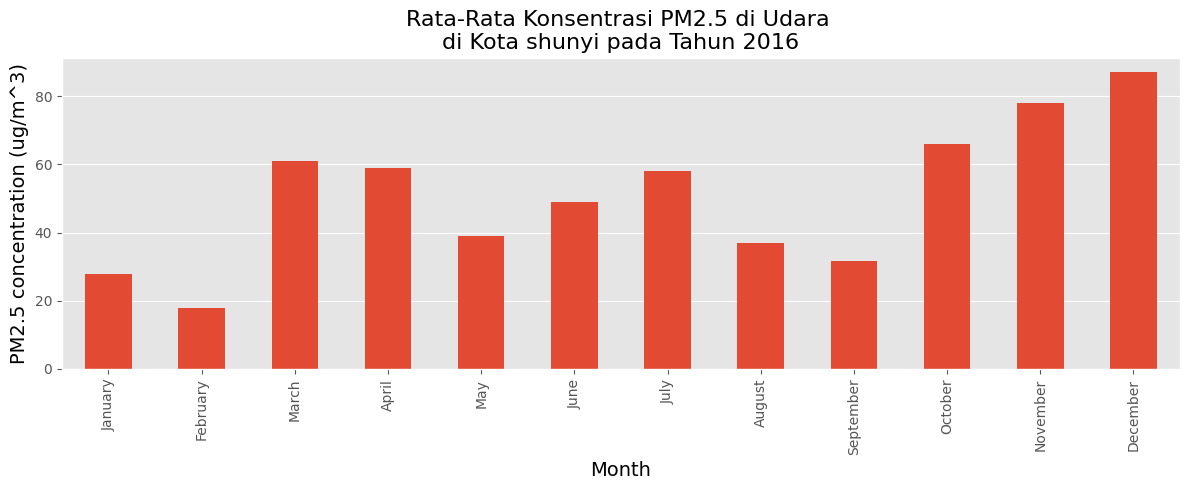

In [20]:
#mengambil data hanya di tahun 2016
prsa_shunyi_df['year'] = prsa_shunyi_df['year'].astype(int)
data_2016 = prsa_shunyi_df[prsa_shunyi_df['year'] == 2016]


monthly_data_2016 = data_2016[['month', 'PM2.5']]

months = ['January','February','March','April','May','June','July',
         'August','September','October','November','December']

ordered_monthdf = pd.DataFrame(months,columns=['month'])

map_dict = {}
for i,j in enumerate(months):
    map_dict.setdefault(i+1,j)

monthly_data_2016.month = monthly_data_2016.month.map(map_dict)

monthly_average = monthly_data_2016.groupby('month').median()
monthly_average = pd.merge(ordered_monthdf,monthly_average,left_on='month',right_index=True)
monthly_average = np.round(monthly_average,1)
monthly_average = monthly_average.set_index('month')

# mem-plot data
with plt.style.context('ggplot'):
    monthly_average.plot(figsize=(12,5),legend=False,kind='bar',linewidth=.9)
    plt.xlabel('Month',fontsize=14)
    plt.ylabel('PM2.5 concentration (ug/m^3)',fontsize=14)
    plt.title('Rata-Rata Konsentrasi PM2.5 di Udara \ndi Kota shunyi pada Tahun 2016',fontsize=16)
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()

### Pertanyaan 2: Di jam berapakah rata-rata jumlah PM2.5 di udara tinggi?

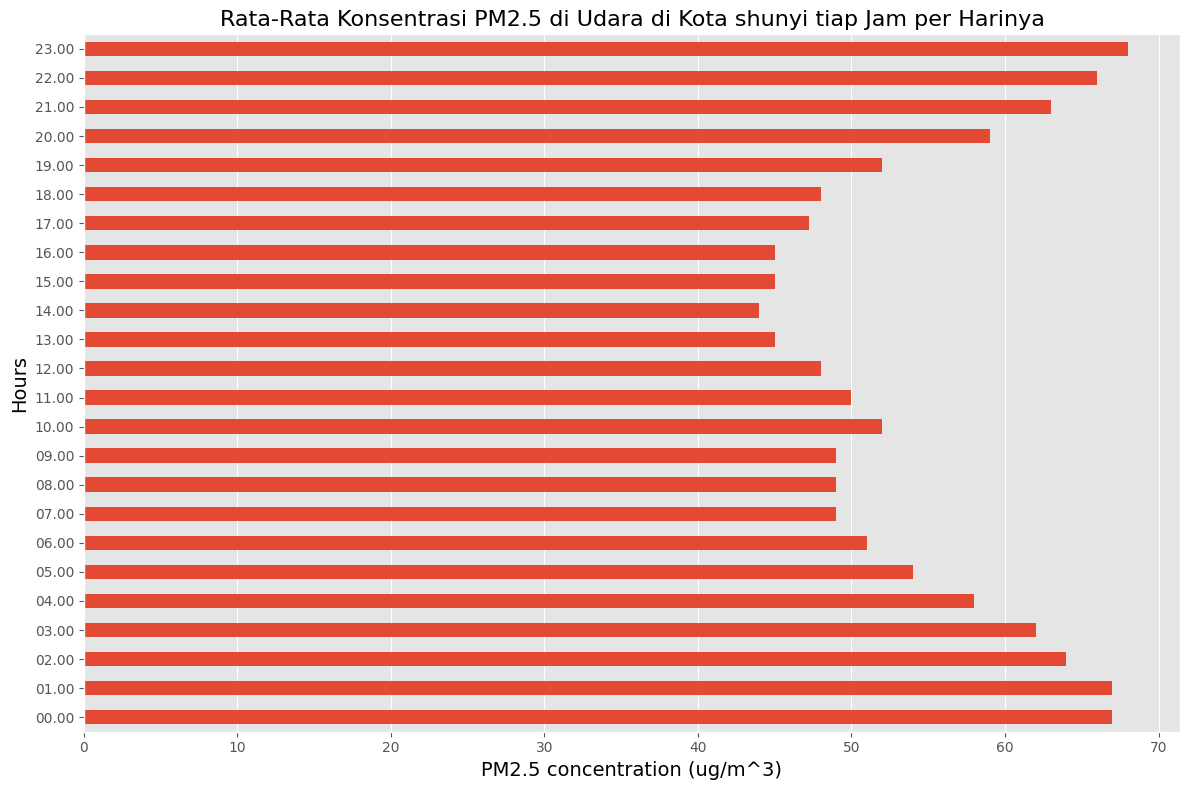

In [21]:
hourly_data = prsa_shunyi_df[['hour','PM2.5']]

hrs = ['00.00','01.00','02.00','03.00','04.00','05.00','06.00','07.00','08.00','09.00','10.00',
       '11.00','12.00','13.00','14.00','15.00','16.00','17.00','18.00','19.00',
       '20.00','21.00','22.00','23.00']

hour_dict = {}
for i,j in enumerate(hrs):
    hour_dict.setdefault(i,j)
    
hourly_data = hourly_data.groupby('hour').median().reset_index()
hourly_data.hour = hourly_data.hour.map(hour_dict)
hourly_data = hourly_data.set_index('hour')

# mem-plot data
with plt.style.context('ggplot'):
    hourly_data.plot(figsize=(12,8),legend=False,kind='barh',linewidth=.9)
    plt.ylabel('Hours',fontsize=14)
    plt.xlabel('PM2.5 concentration (ug/m^3)',fontsize=14)
    plt.title('Rata-Rata Konsentrasi PM2.5 di Udara di Kota shunyi tiap Jam per Harinya',fontsize=16)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclusion pertanyaan 1: Rata-rata konsentrasi PM2.5 dalam udara nilai tertinggi di tahun 2016 jatuh pada bulan desember
- Conclusion pertanyaan 2: Menghitung dan menampilkan rata-rata konsentrasi PM2.5 di Kota Shunyi per jam dalam sehari, dan memberikan visualisasi yang jelas tentang bagaimana kualitas udara (konsentrasi PM2.5) bervariasi sepanjang hari, yang dapat membantu dalam analisis dan pengambilan keputusan terkait kesehatan masyarakat dan kebijakan lingkungan.